In [72]:
import numpy as np
import random
import read_FlowersDataset as flowers
import BatchDatsetReader as dataset
import math
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob
from scipy import misc
from skimage import color
import pandas as pd
import numpy as np
import _pickle as cPickle
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.transform

In [73]:
DATA_DIR = 'logs/image_pred_no_heatmap'
HEAT_DATA_DIR = 'logs/image_pred_heatmap'
IMAGE_SIZE = 256
BATCH_SIZE = 9

In [74]:
def show_images(images, gray=False):
    if gray:
        images = np.reshape(color.rgb2gray(images), [images.shape[0], -1])
    else:
        images = np.reshape(images, [images.shape[0], -1,3])
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn*3, sqrtn*3))
    gs = gridspec.GridSpec(1, images.shape[0])
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        if(gray):
            plt.imshow(img.reshape([sqrtimg,sqrtimg]),cmap = plt.get_cmap('gray'))
        else:
            plt.imshow(img.reshape([sqrtimg,sqrtimg,3]))
        
    return

In [ ]:
def show_heatmap(images, heatmaps):
    images = np.reshape(images, [images.shape[0], -1,3])
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn*3, sqrtn*3))
    gs = gridspec.GridSpec(1, images.shape[0])
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([sqrtimg,sqrtimg,3]))
        
    return

In [91]:
original_images = {}
pred_images = {}
for filename in glob.glob(DATA_DIR+'/*'):
    if filename.split("/")[-1][:2]=="gt":
        idx = filename.split("/")[-1].split(".")[0][2:]
        original_images[idx]=filename
    elif filename.split("/")[-1][:4]=="pred":
        idx = filename.split("/")[-1].split(".")[0][4:]
        pred_images[idx] = filename

heat_images = {}

for filename in glob.glob(HEAT_DATA_DIR+'/*'):
    if filename.split("/")[-1][:4]=="pred":
        idx = filename.split("/")[-1].split(".")[0][4:]
        heat_images[idx] = filename

def get_random(count, original_images, pred_images, heat_images):
    gt = []
    pred = []
    heat = []
    no_images = len(original_images)
    idxs = np.random.choice(no_images, count)
    print(idxs)
    for i in idxs:
        gt.append(misc.imread(original_images[str(i)]))
        pred.append(misc.imread(pred_images[str(i)]))
        heat.append(misc.imread(heat_images[str(i)]))
    return np.asarray(gt), np.asarray(pred), np.asarray(heat)

In [55]:
data = pd.read_pickle("/Users/cyrus/desktop/testset-final.pickle")
def load_image( path ):
    try:
        img = skimage.io.imread( path )
    except Exception as e:
        print(e)
        return None

    img = skimage.color.rgb2lab(img)
    # 生成灰度图
    img[:,:,2] = 0
    img[:,:,1] = 0
    img = skimage.color.lab2rgb(img)

    if img is None: return None
    if len(img.shape) < 2: return None
    if len(img.shape) == 4: return None
    if len(img.shape) == 2: img=np.tile(img[:,:,None], 3)
    if img.shape[2] == 4: img=img[:,:,:3]
    if img.shape[2] > 4: return None

    #TODO: ！！提醒zxy 修改自己的代码 两边resize逻辑不一样 换成这个吧！！
    resized_img = skimage.transform.resize( img, [224,224] , mode='constant')
    return resized_img

/Users/cyrus/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cyrus/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/Users/cyrus/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


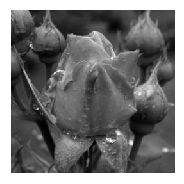

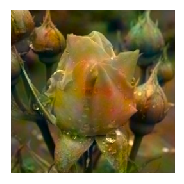

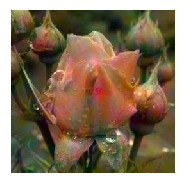

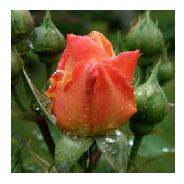

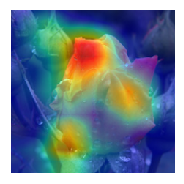

In [115]:
#index = random.randint(0,159)
index=50
gt = np.asarray([misc.imread(original_images[str(index)])])
pred = np.asarray([misc.imread(pred_images[str(index)])])
heat = np.asarray([misc.imread(heat_images[str(index)])])
show_images(gt, True)
show_images(pred)
show_images(heat)
show_images(gt)
show_images(gt)

#NOTES: 35 test samples per class, 175 test samples in total
#NOTES: 699 train samples per class, 3495 train samples in total

#data = pd.read_pickle("/Users/Miyeah/Downloads/trainset-final.pickle")

#图片序号 可以自行更改看效果
record_idx = index
record = data[record_idx:record_idx+1]
# print(record)
#修改flower_photos_new文件夹前缀地址
path = record["image_path"].values[0].replace("/content/","/Users/cyrus/desktop/")
label_name = record["label_name"].values[0]
raw = record["heatmap"].values[0]
heatmap = cPickle.loads(bytes(raw, "utf-8"), encoding="bytes")
# print()
# print("----Result----")
# print(path)
# print(label_name)
# #热力图原始数据
# print(heatmap)
#img = load_image(path)
#plt.imshow(img)
plt.imshow(heatmap, cmap=plt.cm.jet, alpha=0.5, interpolation='nearest' )
#plt.show()

[145 120 139  15  76]


/Users/cyrus/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/Users/cyrus/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:27: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/Users/cyrus/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


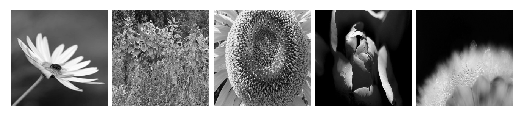

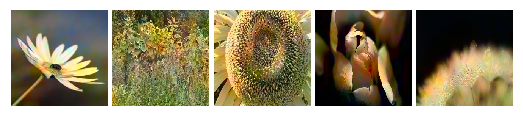

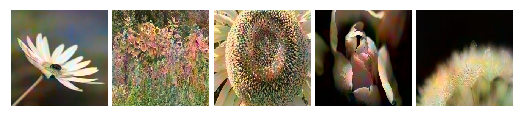

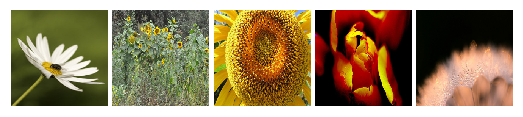

In [118]:
gt, pred, heat = get_random(5, original_images, pred_images, heat_images)

show_images(gt, True)
show_images(pred)
show_images(heat)
show_images(gt)


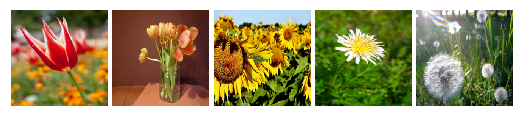

In [12]:
show_images(gt)

In [20]:
from sklearn.metrics import mean_squared_error
pred_mse = 0.0
gray_mse = 0.0
for k in original_images.keys():
    gt = color.rgb2lab(misc.imread(original_images[k]))
    pred = color.rgb2lab(misc.imread(pred_images[k]))
    gt = gt[:, :, 1:3]
    gt = gt.flatten()
    pred = pred[:,:,1:3]
    pred = pred.flatten()
    gray = np.zeros(gt.shape)
    pred_mse += mean_squared_error(gt, pred)
    gray_mse += mean_squared_error(gt, gray)
print("mse of prediction = ", pred_mse/len(original_images))
print("mse of gray image = ", gray_mse/len(original_images))
#print(gt.shape)

/Users/cyrus/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/Users/cyrus/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


mse of prediction =  419.535095001
mse of gray image =  680.682632281


/Users/cyrus/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


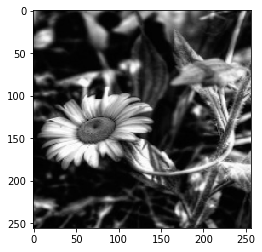

In [30]:
a = misc.imread(original_images['1'])
lab_image = color.rgb2lab(a)
lab_scaled = (lab_image + [0, 128, 128]) / [100, 255, 255]
plt.imshow(lab_image[:,:,0], cmap = plt.get_cmap('gray'))


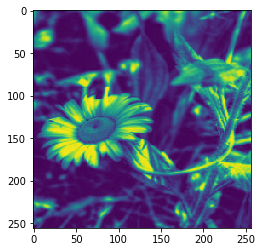

In [28]:
plt.imshow(color.rgb2gray(rgb_image))